# **IOT Intrusion detction Datast**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Try reading the file with 'ISO-8859-1' or 'latin1' encoding
data = pd.read_csv('/content/drive/MyDrive/Train_Test_Network.csv', encoding='ISO-8859-1')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report



# Encode categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Separate features and target
X = data.drop(columns=['label', 'type'])  # Drop target and unrelated column
y = data['label']
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Balance the dataset using SMOTE and Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_balanced)

# Apply PCA for feature selection
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train = pca.fit_transform(X_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali

# **Experimental stacking classifiers and individual model codes**

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import time

# Create RidgeClassifier object
ridge_clf = RidgeClassifier(alpha=1.0, fit_intercept=True, class_weight=None, solver="auto", random_state=None)

# Train the classifier and measure the execution time
start_time = time.time()
ridge_clf.fit(X_train, y_train_balanced)  # Using X_pca after scaling and PCA transformation
end_time = time.time()

# Predict on the test set (apply the same scaling and PCA transformation to the test set)
X_test_scaled = scaler.transform(X_test)  # Scale the test set using the same scaler
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA transformation to the scaled test set

y_pred = ridge_clf.predict(X_test_pca)

# Calculate accuracy and F-score
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('F-score:', f_score)
print('Recall:', recall)
print('Precision:', precision)
print('Execution time:', end_time - start_time, 'seconds')


Accuracy: 0.8684510188810203
F-score: 0.8336624430914377
Recall: 0.9429519791537412
Precision: 0.7470753047581596
Execution time: 0.5641825199127197 seconds


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time

# Create GaussianNB classifier
clf = GaussianNB()

# Train the classifier and measure the execution time
start_time = time.time()
clf.fit(X_train, y_train_balanced)  # Using X_pca after scaling and PCA transformation
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print("Execution time:", execution_time)

# Predict on the test set (apply the same scaling and PCA transformation to the test set)
X_test_scaled = scaler.transform(X_test)  # Scale the test set using the same scaler
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA transformation to the scaled test set

# Predict
y_pred = clf.predict(X_test_pca)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

# Print the results
print('Accuracy:', accuracy)
print('F-score:', f_score)
print('Recall:', recall)
print('Precision:', precision)
print('Execution time:', execution_time, 'seconds')


Execution time: 0.4306633472442627
Accuracy: 0.5513019336507282
F-score: 0.5513019336507282
Recall: 0.5513019336507282
Precision: 0.5513019336507282
Execution time: 0.4306633472442627 seconds


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time

# Create LinearDiscriminantAnalysis classifier
clf = LinearDiscriminantAnalysis()

# Train the classifier and measure the execution time
start_time = time.time()
clf.fit(X_train, y_train_balanced)  # Using X_pca after scaling and PCA transformation
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print("Execution time:", execution_time)

# Predict on the test set (apply the same scaling and PCA transformation to the test set)
X_test_scaled = scaler.transform(X_test)  # Scale the test set using the same scaler
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA transformation to the scaled test set

# Predict
y_pred = clf.predict(X_test_pca)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

# Print the results
print('Accuracy:', accuracy)
print('F-score:', f_score)
print('Recall:', recall)
print('Precision:', precision)
print('Execution time:', execution_time, 'seconds')


Execution time: 2.330563545227051
Accuracy: 0.8684510188810203
F-score: 0.8684510188810203
Recall: 0.8684510188810203
Precision: 0.8684510188810203
Execution time: 2.330563545227051 seconds


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time
from sklearn.metrics import classification_report

# Create an instance of logistic regression classifier with a penalty
clf = LogisticRegression(solver='lbfgs', penalty='l2', C=0.1)  # Lower C increases regularization (penalty)

# Train the classifier
start_time = time.time()
clf.fit(X_train, y_train_balanced)  # Using X_pca after scaling and PCA transformation
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

# Predict on the test set (apply the same scaling and PCA transformation to the test set)
X_test_scaled = scaler.transform(X_test)  # Scale the test set using the same scaler
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA transformation to the scaled test set

# Make predictions on the test data
y_pred = clf.predict(X_test_pca)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('F-score:', f_score)
print('Recall:', recall)
print('Precision:', precision)
print('Execution time:', execution_time, 'seconds')


Accuracy: 0.8861499419796333
F-score: 0.8568311376592205
Recall: 0.9745005583819333
Precision: 0.7645169140910197
Execution time: 11.810564279556274 seconds


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time
from sklearn.metrics import classification_report

# Create an instance of logistic regression classifier with a penalty
clf = LogisticRegression(solver='liblinear', penalty='l1', C=0.001)  # Lower C increases regularization (penalty)

# Train the classifier
start_time = time.time()
clf.fit(X_train, y_train_balanced)  # Using X_pca after scaling and PCA transformation
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

# Predict on the test set (apply the same scaling and PCA transformation to the test set)
X_test_scaled = scaler.transform(X_test)  # Scale the test set using the same scaler
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA transformation to the scaled test set

# Make predictions on the test data
y_pred = clf.predict(X_test_pca)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('F-score:', f_score)
print('Recall:', recall)
print('Precision:', precision)
print('Execution time:', execution_time, 'seconds')


Accuracy: 0.8875923174527433
F-score: 0.8573630396190843
Recall: 0.9663419779128924
Precision: 0.7704731517894685
Execution time: 12.731640338897705 seconds


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

# Define the base learners
base_learners = [
    ('lda', LinearDiscriminantAnalysis()),
    ('lr', LogisticRegression(solver='liblinear', penalty='l1', C=0.001)),
    ('gnb', GaussianNB())
]

# Define the meta learner
meta_learner = RidgeClassifier(alpha=1.0, fit_intercept=True, class_weight=None, solver='auto', random_state=None)

# Create the stacking model
stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Train the classifier using the transformed data
start_time = time.time()
stack_model.fit(X_train, y_train_balanced)  # Using X_pca after scaling and PCA transformation
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time
print('Execution Time (s):', execution_time)

# Predict on the test set (apply the same scaling and PCA transformation to the test set)
X_test_scaled = scaler.transform(X_test)  # Scale the test set using the same scaler
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA transformation to the scaled test set

# Make predictions
y_pred = stack_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Execution Time (s): 54.44096899032593
Accuracy: 0.8843822186554458
F1-score: 0.854204559440942
Precision: 0.7638369163792893
Recall: 0.9688236753939695


# **Actual Model code**

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.combine import SMOTETomek
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# Assuming you have pre-processed the dataset and balanced it using SMOTE-Tomek, apply scaling and PCA
# First, apply scaling and PCA to the balanced training data (X_train_balanced)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)  # Scaling the training data

# Apply PCA for feature selection
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)  # PCA transformation on scaled training data

# Apply the same transformations (scaling and PCA) to the test set (X_test)
X_test_scaled = scaler.transform(X_test)  # Scale the test data using the same scaler
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA to the scaled test data

# Define individual models
ridge_clf = RidgeClassifier()
sgd_clf = SGDClassifier()
lda_clf = LinearDiscriminantAnalysis()
pa_clf = PassiveAggressiveClassifier(random_state=42)

# Fit and evaluate individual models
models = {
    'Ridge Classifier': ridge_clf,
    'SGD Classifier': sgd_clf,
    'Linear Discriminant Analysis': lda_clf,
    'Passive Aggressive Classifier': pa_clf
}

for name, model in models.items():
    model.fit(X_train_pca, y_train_balanced)  # Fit the model on PCA-transformed training data
    y_pred = model.predict(X_test_pca)  # Predict on PCA-transformed test data
    print(f"\n{name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

# Implement stacking model
stacking_clf = StackingClassifier(
    estimators=[
        ('ridge', ridge_clf),
        ('sgd', sgd_clf),
        ('lda', lda_clf)
    ],
    final_estimator=pa_clf,
    cv=5
)

# Fit and evaluate stacking model
stacking_clf.fit(X_train_pca, y_train_balanced)  # Train the stacking model
y_pred_stacking = stacking_clf.predict(X_test_pca)  # Predict using the stacking model

# Evaluate stacking model
print("\nStacking Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_stacking):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_stacking):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_stacking):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_stacking):.2f}")



Ridge Classifier
Accuracy: 0.87
Precision: 0.75
Recall: 0.94
F1-Score: 0.83

SGD Classifier
Accuracy: 0.88
Precision: 0.77
Recall: 0.95
F1-Score: 0.85

Linear Discriminant Analysis
Accuracy: 0.87
Precision: 0.75
Recall: 0.94
F1-Score: 0.83

Passive Aggressive Classifier
Accuracy: 0.84
Precision: 0.70
Recall: 0.97
F1-Score: 0.81

Stacking Classifier
Accuracy: 0.89
Precision: 0.79
Recall: 0.96
F1-Score: 0.86


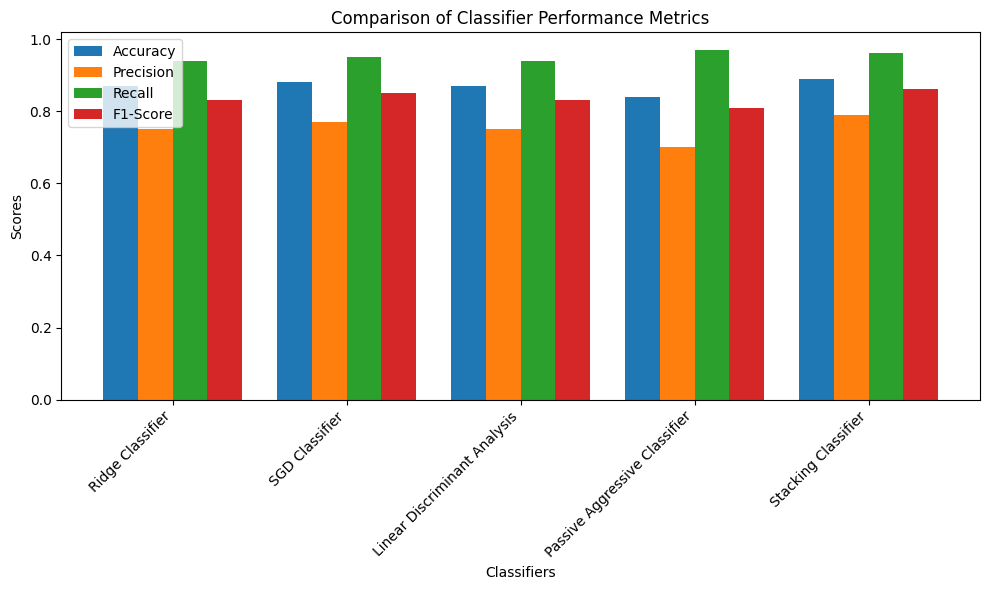

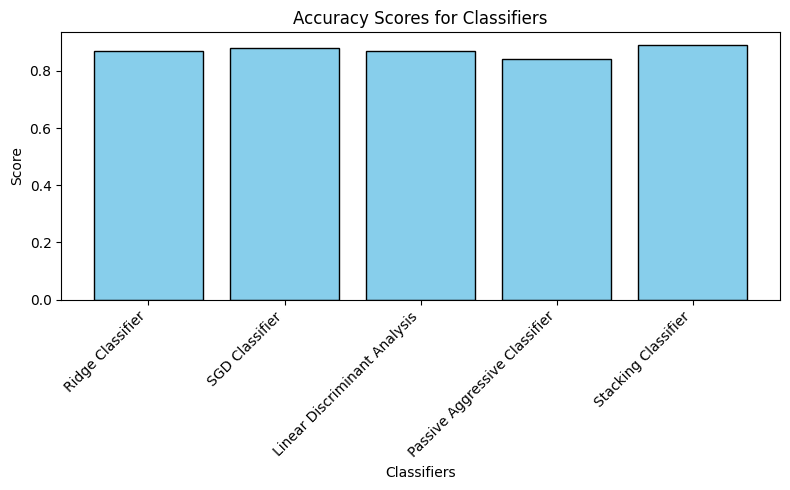

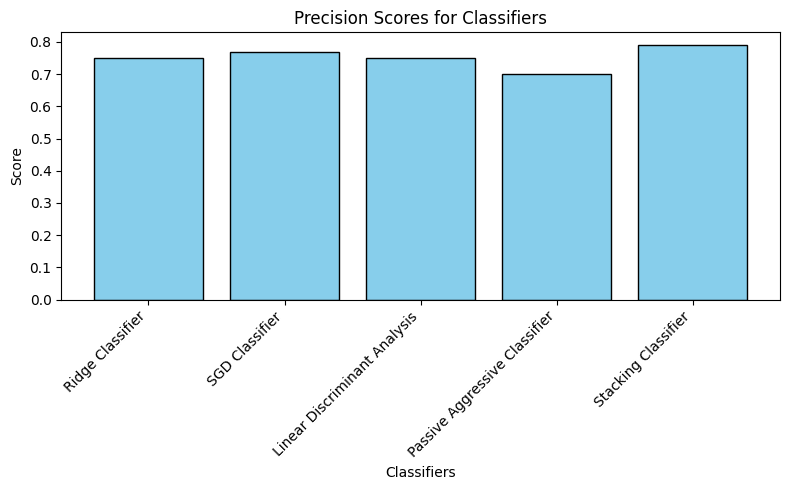

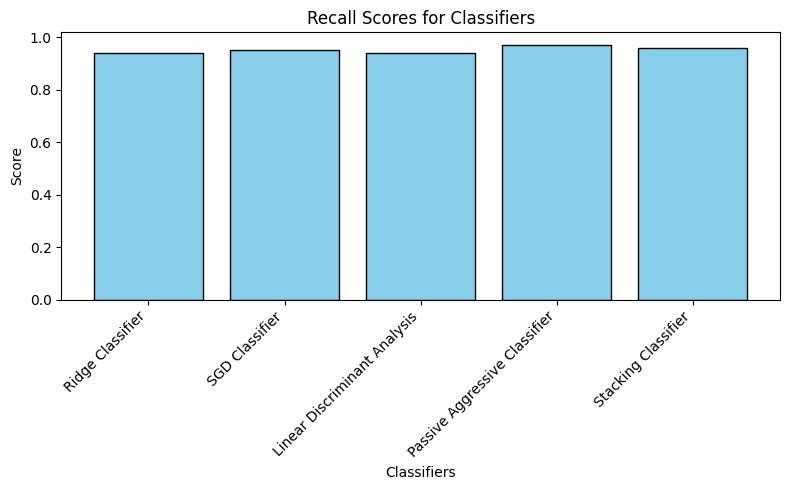

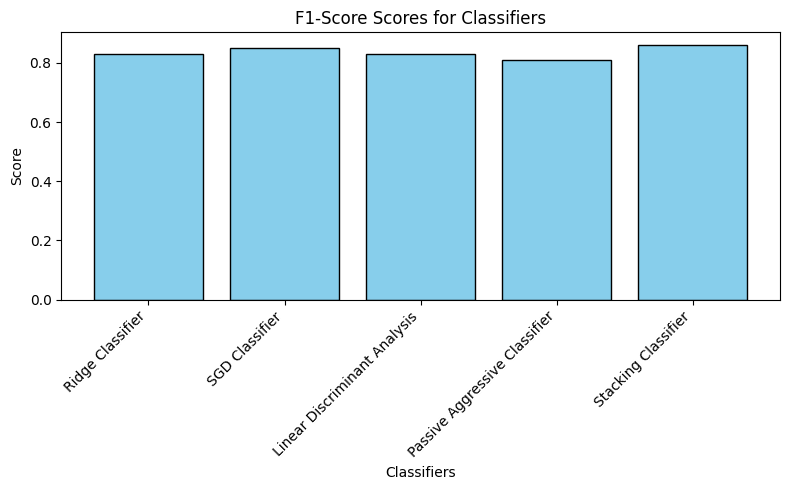

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classifiers and their metrics
classifiers = ['Ridge Classifier', 'SGD Classifier', 'Linear Discriminant Analysis', 'Passive Aggressive Classifier', 'Stacking Classifier']
metrics = {
    'Accuracy': [0.87, 0.88, 0.87, 0.84, 0.89],
    'Precision': [0.75, 0.77, 0.75, 0.70, 0.79],
    'Recall': [0.94, 0.95, 0.94, 0.97, 0.96],
    'F1-Score': [0.83, 0.85, 0.83, 0.81, 0.86]
}

# Combined bar plot
x = np.arange(len(classifiers))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, (metric, values) in enumerate(metrics.items()):
    ax.bar(x + i * width, values, width, label=metric)

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classifier Performance Metrics')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(classifiers, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

# Separate bar plots for each metric
for metric, values in metrics.items():
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(classifiers, values, color='skyblue', edgecolor='black')
    ax.set_xlabel('Classifiers')
    ax.set_ylabel('Score')
    ax.set_title(f'{metric} Scores for Classifiers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig("separate_metric_bars.png", dpi=300, bbox_inches="tight")
    plt.show()


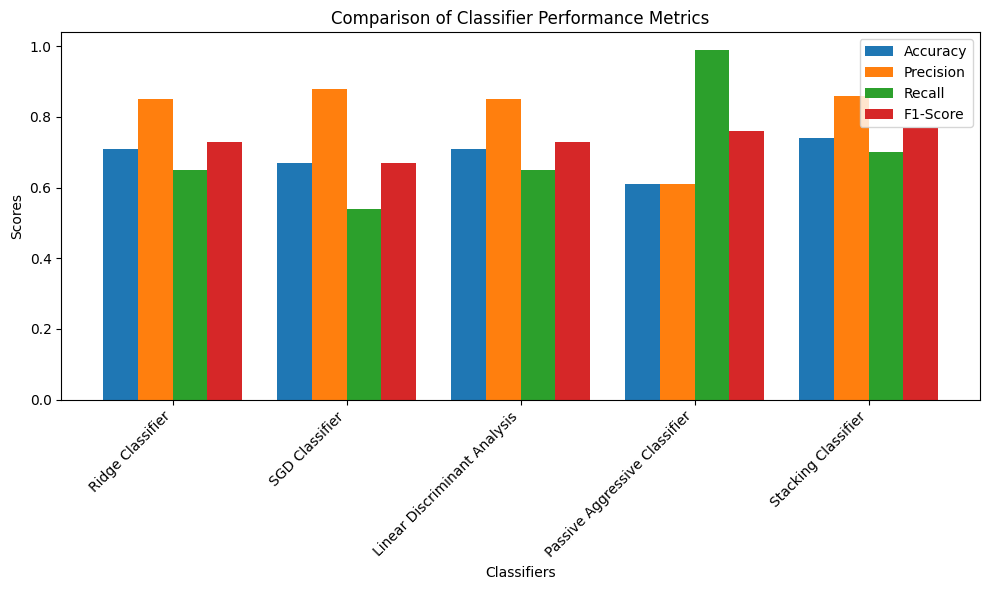

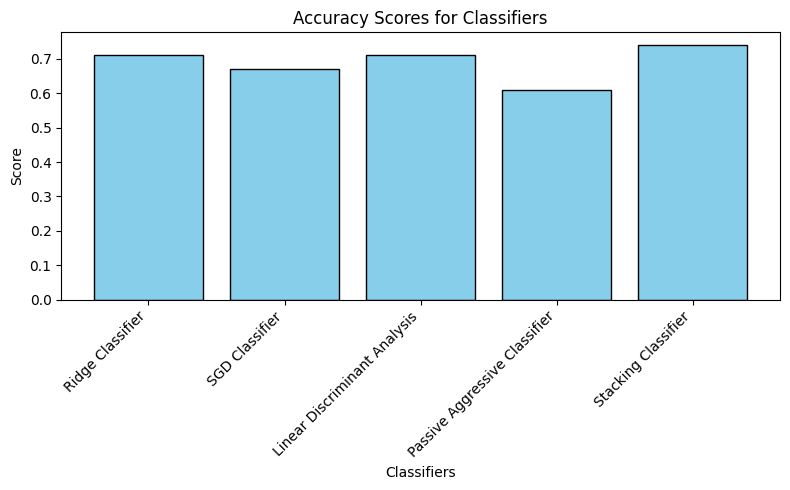

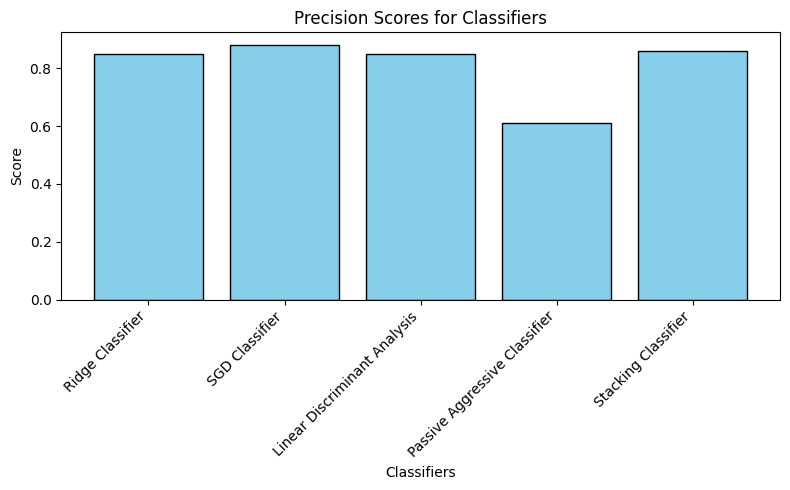

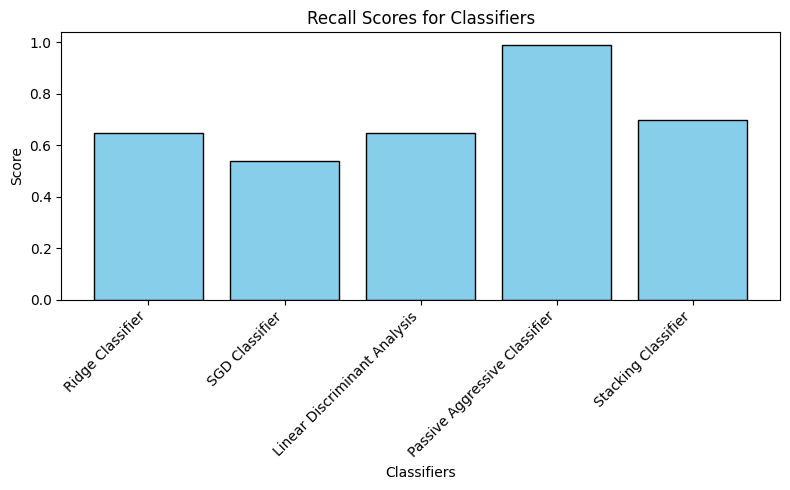

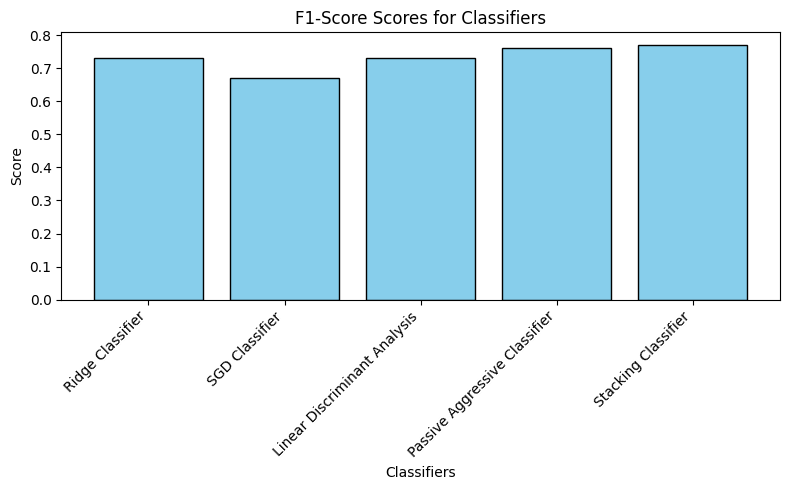

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classifiers and their metrics
classifiers = ['Ridge Classifier', 'SGD Classifier', 'Linear Discriminant Analysis', 'Passive Aggressive Classifier', 'Stacking Classifier']
metrics = {
    'Accuracy': [0.71, 0.67, 0.71, 0.61, 0.74],
    'Precision': [0.85, 0.88, 0.85, 0.61, 0.86],
    'Recall': [0.65, 0.54, 0.65, 0.99, 0.70],
    'F1-Score': [0.73, 0.67, 0.73, 0.76, 0.77]
}

# Combined bar plot
x = np.arange(len(classifiers))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, (metric, values) in enumerate(metrics.items()):
    ax.bar(x + i * width, values, width, label=metric)

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classifier Performance Metrics')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(classifiers, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

# Separate bar plots for each metric
for metric, values in metrics.items():
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(classifiers, values, color='skyblue', edgecolor='black')
    ax.set_xlabel('Classifiers')
    ax.set_ylabel('Score')
    ax.set_title(f'{metric} Scores for Classifiers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

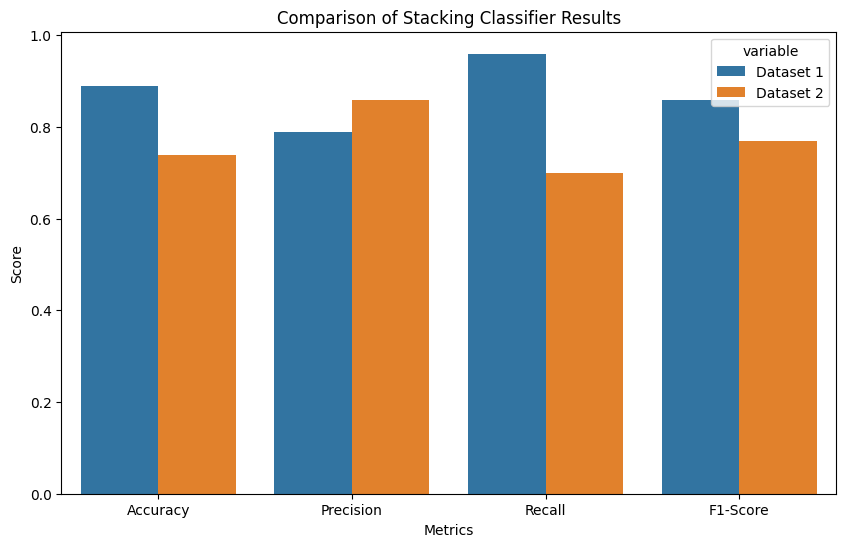

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for the first classifier
classifier_1 = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values_1 = [0.89, 0.79, 0.96, 0.86]

# Data for the second classifier
classifier_2 = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values_2 = [0.74, 0.86, 0.70, 0.77]

# Create a DataFrame for the results
import pandas as pd
df = pd.DataFrame({
    'Metric': classifier_1,
    'Dataset 1': values_1,
    'Dataset 2': values_2
})

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Metric', y='value', hue='variable',
            data=pd.melt(df, id_vars='Metric', var_name='variable', value_name='value'))

# Display the plot
plt.title('Comparison of Stacking Classifier Results')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.show()
